# April report TIC

Import libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read data from .csv

In [12]:
df = pd.read_csv("data.csv", sep=";")

df = df.rename(columns={'Дата': 'Date', 'Пол': 'Age', 'Город': 'City', 'Цель визита': 'Purpose_of_visit_0', 
                        'Цель визита_1': 'Purpose_of_visit_1', 'Цель визита_2': 'Purpose_of_visit_2', 
                        'Вопросы': 'Questions', 'Комментарии': 'Comments'})

df.head()
df.tail()

,Date,Age,City,Purpose_of_visit_0,Purpose_of_visit_1,Purpose_of_visit_2,Questions,Comments
796,30.04.2024,Младше 35 лет,NaN,Сувениры,NaN,NaN,NaN,NaN
797,30.04.2024,Младше 35 лет,NaN,Просто посмотреть,NaN,NaN,NaN,NaN
798,30.04.2024,Старше 35 лет,NaN,Просто посмотреть,NaN,NaN,NaN,NaN
799,30.04.2024,Младше 35 лет,NaN,Иное,Сувениры,NaN,отправка открыток,NaN
800,30.04.2024,Младше 35 лет,NaN,Иное,Сувениры,NaN,NaN,NaN


# Cleaning data

In [13]:
# """ Now I want to add column for weekdays. In process, I realised that I need to change the date format 
#     for my own comfort. I managed those things like this """
df.Date = df.Date.str.split(".").str[::-1].str.join("-")

weekday = pd.to_datetime(df.Date).dt.day_name()
df.insert(1, 'Weekday', weekday)
df.head()

,Date,Weekday,Age,City,Purpose_of_visit_0,Purpose_of_visit_1,Purpose_of_visit_2,Questions,Comments
0,2024-04-01,Monday,Младше 35 лет,тверь,Просто посмотреть,NaN,NaN,NaN,NaN
1,2024-04-01,Monday,Старше 35 лет,Москва,Полиграфия,NaN,NaN,NaN,NaN
2,2024-04-01,Monday,Старше 35 лет,Москва,Полиграфия,NaN,NaN,NaN,NaN
3,2024-04-01,Monday,Младше 35 лет,тверь,Просто посмотреть,NaN,NaN,NaN,NaN
4,2024-04-01,Monday,Младше 35 лет,тверь,Просто посмотреть,NaN,NaN,NaN,NaN


In [14]:
df.City = df.City.str.lstrip().str.rstrip().str.title()
df.Age = df.Age.str.lstrip().str.rstrip().str.title()
df.City = df.City.fillna('Тверь')
df.City.unique()

array(['Тверь', 'Москва', 'Петербург', 'Рязань', '26 - 35 Лет',
       '7 - 12 Лет', '18 - 25 Лет', 'Тула', 'Камчатка', 'Буденновск',
       'Бежецк', 'Питер', 'Екб', 'Москвы', 'Зеленоград', 'Крым', 'Дубна',
       'Московская Область', 'Тверская Обл.', '', 'Клин', 'Калязин',
       'Санкт-Петербург', 'Ярославль', 'Моква'], dtype=object)

04.04 was different format. Let's fix it

In [15]:
edit = df.query('Date == "2024-04-04"')
# edit.head()
# show['Age'] = "Младше 35 лет"
# show.loc['Age'] = "Младше 35 лет"
edit = edit.assign(Age="Младше 35 лет")
edit = edit.assign(City="Тверь")
edit.Purpose_of_visit_0 = edit.Purpose_of_visit_1
edit = edit.assign(Purpose_of_visit_1=np.nan)
edit



,Date,Weekday,Age,City,Purpose_of_visit_0,Purpose_of_visit_1,Purpose_of_visit_2,Questions,Comments
66,2024-04-04,Thursday,Младше 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,Да
67,2024-04-04,Thursday,Младше 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,Да
68,2024-04-04,Thursday,Младше 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,Нет
69,2024-04-04,Thursday,Младше 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,Нет
70,2024-04-04,Thursday,Младше 35 лет,Тверь,Экскурсии,NaN,NaN,NaN,Нет
71,2024-04-04,Thursday,Младше 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,Нет
72,2024-04-04,Thursday,Младше 35 лет,Тверь,Иное,NaN,NaN,сотрудничество,Нет
73,2024-04-04,Thursday,Младше 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,Нет


Replace it in DataFrame

In [16]:
df = df.drop(df.query('Date == "2024-04-04"').index)
df = pd.concat([df.iloc[:66], edit, df.iloc[66:]]).reset_index(drop=True)
df[65:75]

,Date,Weekday,Age,City,Purpose_of_visit_0,Purpose_of_visit_1,Purpose_of_visit_2,Questions,Comments
65,2024-04-03,Wednesday,Старше 35 Лет,Тверь,Полиграфия,Экскурсии,NaN,NaN,NaN
66,2024-04-04,Thursday,Младше 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,Да
67,2024-04-04,Thursday,Младше 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,Да
68,2024-04-04,Thursday,Младше 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,Нет
69,2024-04-04,Thursday,Младше 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,Нет
70,2024-04-04,Thursday,Младше 35 лет,Тверь,Экскурсии,NaN,NaN,NaN,Нет
71,2024-04-04,Thursday,Младше 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,Нет
72,2024-04-04,Thursday,Младше 35 лет,Тверь,Иное,NaN,NaN,сотрудничество,Нет
73,2024-04-04,Thursday,Младше 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,Нет
74,2024-05-05,Sunday,Семья,Тверь,Просто посмотреть,Полиграфия,NaN,NaN,NaN


Editing wrong dates

In [17]:
df = df.replace(["2024-05-05", "2024-06-26"], ["2024-04-05", "2024-04-26"])
df.Date.unique()

array(['2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04',
       '2024-04-05', '2024-04-06', '2024-04-07', '2024-04-09',
       '2024-04-08', '2024-04-10', '2024-04-11', '2024-04-12',
       '2024-04-13', '2024-04-14', '2024-04-15', '2024-04-16',
       '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-20',
       '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24',
       '2024-04-25', '2024-04-26', '2024-04-27', '2024-04-28',
       '2024-04-29', '2024-04-30'], dtype=object)

Let's look at our cities and fix them

In [18]:
df = df.replace(["Питер", "Петербург"], "Санкт-Петербург")
df = df.replace(["Москвы", "Моква"], "Москва")
df = df.replace("", "Тверь")
df.City.unique()


array(['Тверь', 'Москва', 'Санкт-Петербург', 'Рязань', 'Тула', 'Камчатка',
       'Буденновск', 'Бежецк', 'Екб', 'Зеленоград', 'Крым', 'Дубна',
       'Московская Область', 'Тверская Обл.', 'Клин', 'Калязин',
       'Ярославль'], dtype=object)

# Data analysis

How many visitors

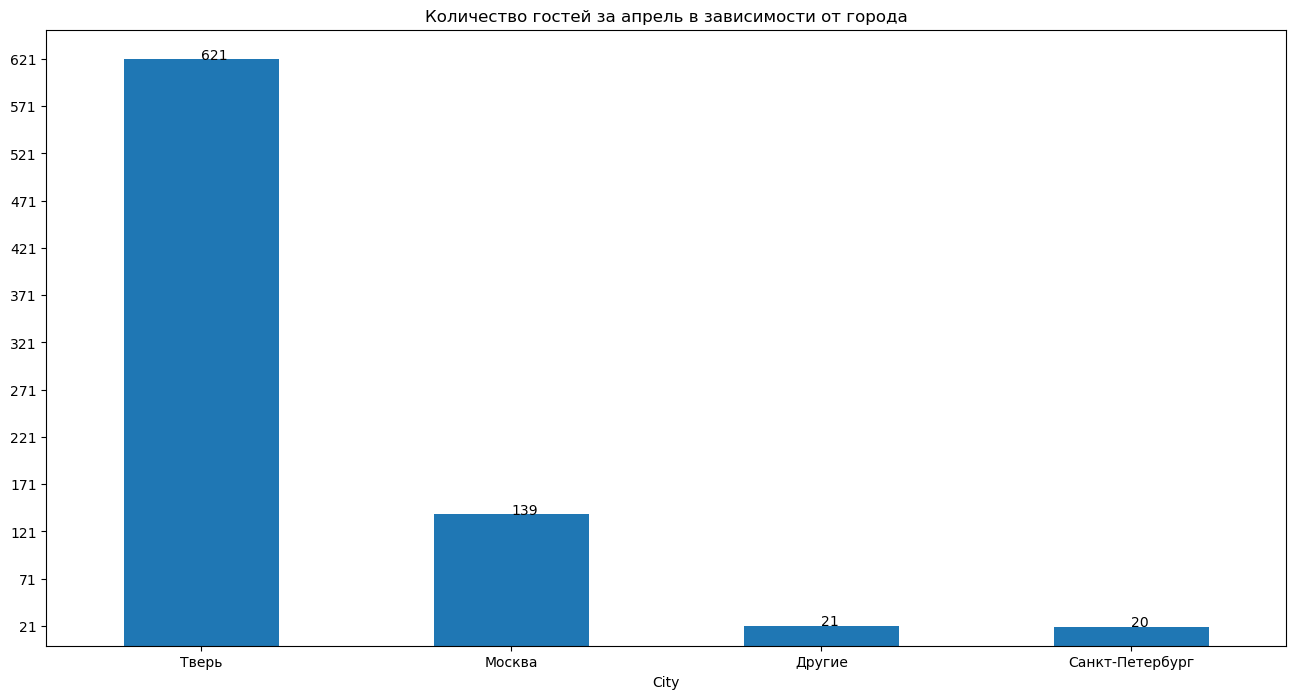

City
Тверь                 621
Москва                139
Санкт-Петербург        20
Московская Область      2
Рязань                  2
Тула                    2
Камчатка                2
Бежецк                  2
Клин                    2
Дубна                   2
Калязин                 1
Тверская Обл.           1
Екб                     1
Крым                    1
Зеленоград              1
Буденновск              1
Ярославль               1
Name: count, dtype: int64

In [19]:
totalCities = df.City.value_counts()

plotCities = totalCities.copy()
plotCities['Другие'] = plotCities.sum() - sum(plotCities[:3])
plotCities = plotCities.sort_values(ascending=False)[:4]

plt.figure(figsize=(16, 8))  
plt.title('Количество гостей за апрель в зависимости от города')
plotCities.plot(kind='bar')
plt.xticks(rotation=0)
plt.yticks(range(max(plotCities), -1, -50))
cities = plotCities.axes[0].to_list()
for i in range(len(cities)):
    plt.annotate(plotCities.iloc[i], (i, plotCities.iloc[i]))
plt.show()
plt.close()

totalCities

Let's plot data about our daily visitors

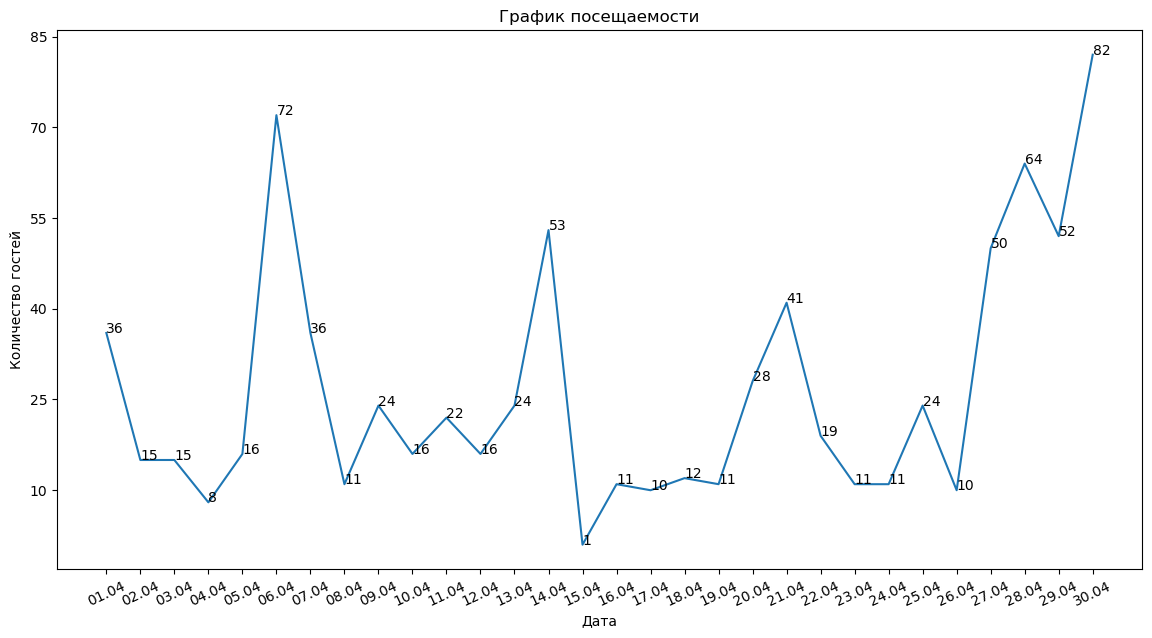

In [20]:
groupByDate = df.groupby('Date').agg({'Date': 'count'})
groupByDate.rename(columns={'Date': 'Total_visitors'}, inplace=True)
# groupByDate

""" Creating arrays for total visitors every day and dates. Plotting those arrays """
totalVisitors = groupByDate.Total_visitors
plotVisitors = totalVisitors.copy()

dates = []
for x in range(1, 30 + 1):
    if x < 10:
        dates.append(f'0{x}.04')
    else:
        dates.append(f'{x}.04')

plt.figure(figsize=(14, 7))
plt.plot(dates, plotVisitors)
plt.title('График посещаемости')
plt.xlabel('Дата')
plt.ylabel('Количество гостей')
plt.xticks(rotation=25)
plt.yticks(range(max(plotVisitors) + 3, -1, -15))
for i in range(len(dates)):
    plt.annotate(plotVisitors.iloc[i], (i, plotVisitors.iloc[i]))
plt.show()